# Transformada de Hough
> El objetivo de esta tarea es implementar y analizar la transformada de Hough para la detección de círculos dentro de una imagen. Eñ programa recibw una imagen en escala de grises y retorna una copia de la imagen con:
- Una circunferencia de color indicando el contorno de todos los objetos circulares presentes en la imagen.
- Una línea recta que indique el radio en pixeles de todos los objetos encontrados.

---

# Metodología

## Lectura de Datos
Por medio de Python, se leen los archivos (imágenes) en la carpeta "circles"

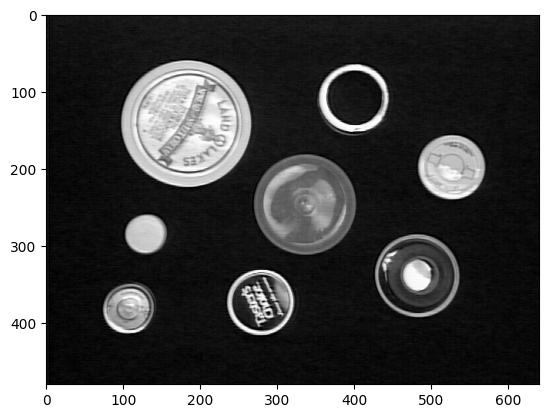

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import os

from skimage import io, color


DATA_DIR = "./circles"
def load_image(img_name):
    fn = os.path.join(DATA_DIR, img_name)
    img = io.imread(fn)
    
    # Si bien las imagenes dadas ya se encuentran en escala de grises, se hace el check igual
    # Cómo están en formato .gif, pueden tener un canal extra que no es necesario
    if len(img.shape) == 4:
        img = img[0]
    if len(img.shape) == 3:
        if img.shape[0] == 1:  
            img = img[0]  
        elif img.shape[2] == 1:  
            img = img[:, :, 0] 
        else:
            img = color.rgb2gray(img)
    
    return img

imagen_1 = load_image("circles1.gif")
imagen_2 = load_image("circles2.gif")
imagen_3 = load_image("circles3.gif")

plt.imshow(imagen_1, cmap='gray')

Se muestran las imágenes cargadas

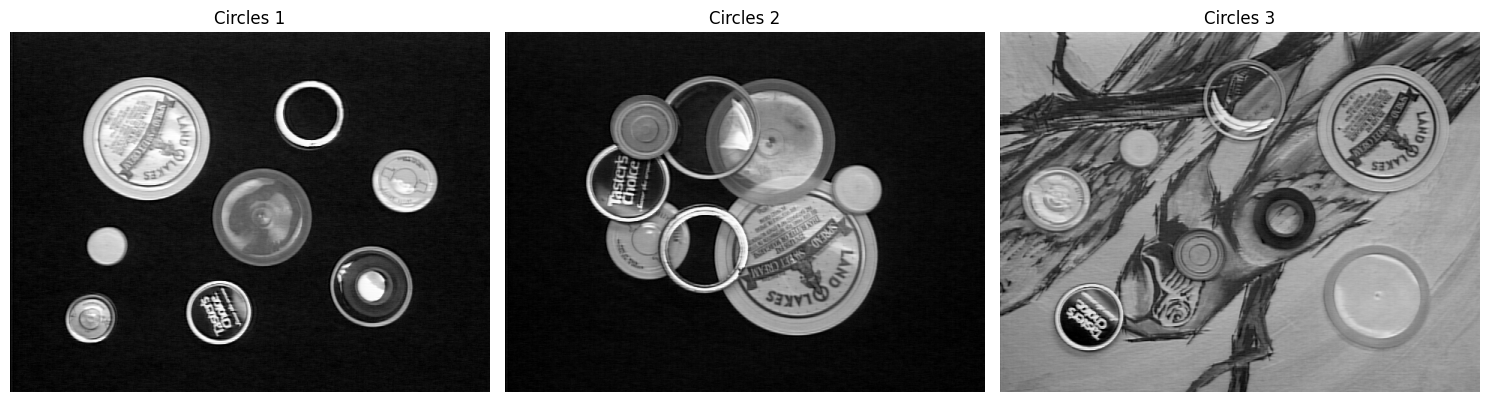

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(imagen_1, cmap='gray')
axes[0].set_title('Circles 1')
axes[0].axis('off')

axes[1].imshow(imagen_2, cmap='gray')
axes[1].set_title('Circles 2')
axes[1].axis('off')

axes[2].imshow(imagen_3, cmap='gray')
axes[2].set_title('Circles 3')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Binarización y Ajuste de $\sigma$
> Utilice el método de Canny para pre-procesar la imagen de entrada antes de aplicar la transformada de Hough. En este primer paso puede utilizar una función de Canny ya implementada en scikit-image u OpenCV. Realice experimentos para determinar un valor adecuado del parámetro sigma del filtro gaussiano, de modo que funcione bien con las imágenes utilizadas.

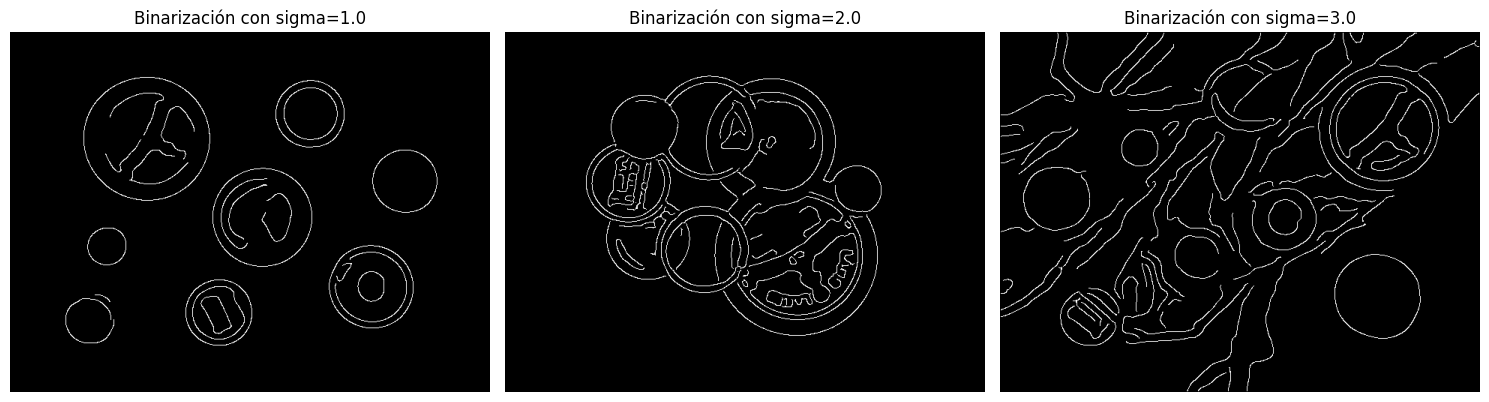

In [ ]:
from skimage import feature

# Aplicar el detector de bordes de Canny a las imágenes
bordes_1 = feature.canny(imagen_1, sigma=4.0)
bordes_2 = feature.canny(imagen_2, sigma=3.0)
bordes_3 = feature.canny(imagen_3, sigma=4.0)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(bordes_1, cmap='gray')
axes[0].set_title('Binarización con sigma=4.0')
axes[0].axis('off')

axes[1].imshow(bordes_2, cmap='gray')
axes[1].set_title('Binarización con sigma=3.0')
axes[1].axis('off')

axes[2].imshow(bordes_3, cmap='gray')
axes[2].set_title('Binarización con sigma=4.0')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Implementación del Método de Hough
> Implemente la transformada de Hough para la detección de círculos. Debe implementar este algoritmo por su cuenta y no utilizar métodos ya implementados. Note que en principio el tamaño de los objetos es desconocido, por lo que el radio será parte del espacio de parámetros que debe encontrar. Nota: recuerde que puede utilizar la información del gradiente para reducir la cantidad de cómputo necesario.